In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("data/exchange-rate-twi.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              304 non-null    int64  
 1   Exchange Rate TWI  304 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


In [14]:
df.isnull().sum()

Month                0
Exchange Rate TWI    0
dtype: int64

<AxesSubplot:xlabel='Month'>

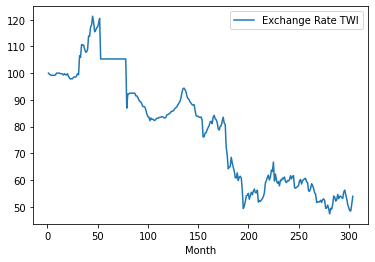

In [15]:
COL_EXCH = 'Exchange Rate TWI'
df.plot.line(x='Month', y='Exchange Rate TWI')

In [16]:
TRAIN = 212; TEST = df.shape[0] - TRAIN
df_train, df_test = df[:TRAIN], df[TRAIN:]
df_train, df_test = df[:TRAIN], df[TRAIN:]
y_actual = df_test[COL_EXCH]
print(df_train.shape[0],df_test.shape[0], y_actual.shape[0] )

212 92 92


In [17]:
df_forecast = pd.DataFrame()

In [18]:
from sklearn.metrics import mean_squared_error

df_summary = pd.DataFrame(columns=['Method', 'RMSE', 'MAPE'])
def calErrors(method, y_actual, y_pred):
    global df_summary
    n = y_actual.shape[0]
    #print(n, y_actual[:4], y_pred[:4])
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred)).round(2)
    mape = (100*((abs(y_actual-y_pred)/y_actual).sum())/n).round(2)
    df_summary = pd.concat([df_summary, pd.DataFrame(data={'Method': [method], 'RMSE':[rmse], 'MAPE':[mape]})])
    print("rmse", rmse, "mape", mape)
    return mape

def plotForecast(method):
    ax=plt.subplot(1,1,1)
    df.plot.line(x='Month', y=COL_EXCH, ax=ax)
    df_forecast.plot.line(y=method, ax=ax)

rmse 5.98 mape 8.41


,Naive
212,52.0
213,52.0
214,52.0
215,52.0
216,52.0


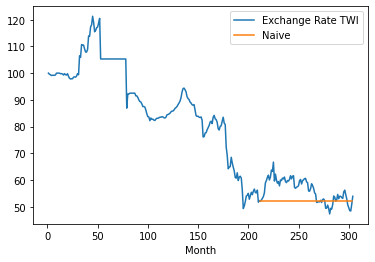

In [19]:
# Naive method
y_pred = df_test[COL_EXCH].copy(deep=True)
y_pred[:] = df_train.loc[TRAIN-1, COL_EXCH]; df_forecast['Naive'] = y_pred
calErrors('Naive', y_actual, y_pred)
plotForecast('Naive')
df_forecast.head()

rmse 32.42 mape 58.13


,Naive,SA
212,52.0,88.33
213,52.0,88.33
214,52.0,88.33
215,52.0,88.33
216,52.0,88.33


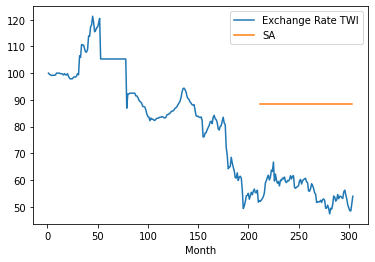

In [20]:
# Simple Average Method
y_pred = df_test[COL_EXCH].copy(deep=True)
y_pred[:] = df_train[COL_EXCH].mean().round(2); df_forecast['SA'] = y_pred
calErrors('Simple Average', y_actual, y_pred)
plotForecast('SA')
df_forecast.head()

In [21]:
df_train[COL_EXCH].rolling(12).mean().round(2)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
207    54.58
208    54.93
209    54.74
210    54.58
211    54.32
Name: Exchange Rate TWI, Length: 212, dtype: float64

rmse 4.66 mape 6.96


,Naive,SA,SMA-12
212,52.0,88.33,54.32
213,52.0,88.33,54.32
214,52.0,88.33,54.32
215,52.0,88.33,54.32
216,52.0,88.33,54.32


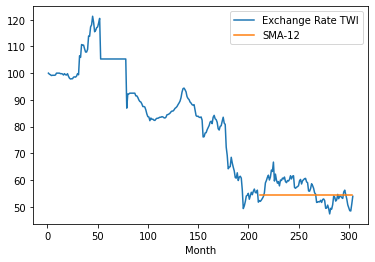

In [22]:
# Simple Moving Average - Window -12
y_pred = df_test[COL_EXCH].copy(deep=True)
y_pred[:] = df_train[COL_EXCH].rolling(12).mean().round(2)[TRAIN-1]; df_forecast['SMA-12'] = y_pred
calErrors('Simple Moving Average - 12', y_actual, y_pred)
plotForecast('SMA-12')
df_forecast.head()

rmse 4.9 mape 7.13


,Naive,SA,SMA-12,SMA-6
212,52.0,88.33,54.32,53.78
213,52.0,88.33,54.32,53.78
214,52.0,88.33,54.32,53.78
215,52.0,88.33,54.32,53.78
216,52.0,88.33,54.32,53.78


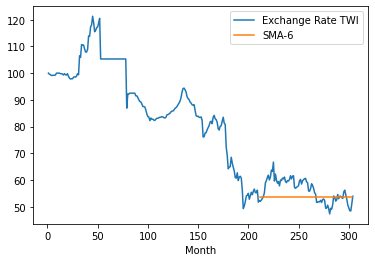

In [23]:
# Simple Moving Average - Window -6
y_pred = df_test[COL_EXCH].copy(deep=True)
y_pred[:] = df_train[COL_EXCH].rolling(6).mean().round(2)[TRAIN-1]; df_forecast['SMA-6'] = y_pred
calErrors('Simple Moving Average - 6', y_actual, y_pred)
plotForecast('SMA-6')
df_forecast.head()

rmse 5.98 mape 8.41


,Naive,SA,SMA-12,SMA-6,SMA-3
212,52.0,88.33,54.32,53.78,52.0
213,52.0,88.33,54.32,53.78,52.0
214,52.0,88.33,54.32,53.78,52.0
215,52.0,88.33,54.32,53.78,52.0
216,52.0,88.33,54.32,53.78,52.0


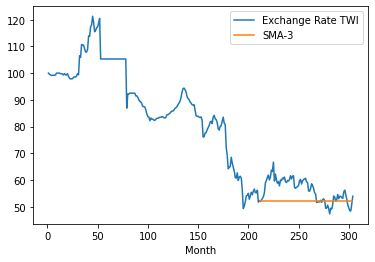

In [26]:
# Simple Moving Average - Window -3
y_pred = df_test[COL_EXCH].copy(deep=True)
y_pred[:] = df_train[COL_EXCH].rolling(3).mean().round(2)[TRAIN-1]; df_forecast['SMA-3'] = y_pred
calErrors('Simple Moving Average - 3', y_actual, y_pred)
plotForecast('SMA-3')
df_forecast.head()

In [27]:
df_summary

,Method,RMSE,MAPE
0,Naive,5.98,8.41
0,Simple Average,32.42,58.13
0,Simple Moving Average - 12,4.66,6.96
0,Simple Moving Average - 6,4.90,7.13
0,Simple Moving Average - 3,4.90,7.13
0,Simple Moving Average - 3,5.98,8.41
